# ML Andrew Ng course 
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import time
import random
import scipy.io as scp

## Ex4 Part 1 Neural Networks

In [2]:
matx=scp.loadmat("ml coursera/ex4data1.mat")

In [3]:
matx.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [44]:
X = matx['X']
X.shape

(5000, 400)

In [64]:
y = matx['y']
y.shape

(5000, 1)

In [46]:
matw=scp.loadmat("ml coursera/ex4weights.mat")
matw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [47]:
theta1 = matw['Theta1']
theta2 = matw['Theta2']

In [48]:
theta1.shape

(25, 401)

In [49]:
theta2.shape

(10, 26)

#### Data Visualization

y = np.array([[0] if i==10 else i for i in list(y)])

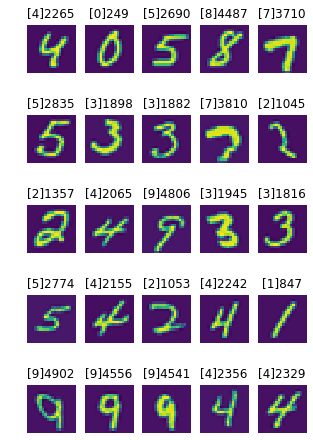

In [51]:
fig, ax = plt.subplots(5, 5, figsize=(5,8), squeeze=False)
for i in range(5):
    for j in range(5):
        k = random.randint(0, 5001)
        ax[i][j].matshow(X[k].reshape((20,20)).transpose())
        ax[i][j].set_title((''+str(y[k])+str(k)))
        ax[i][j].axis("off")

#### Matrices

In [52]:
m = len(X)
n = len(X[0]) +1
#X = np.hstack((np.ones((m,1)),X))   #adding the bias x0
X.shape

(5000, 400)

In [53]:
y.shape

(5000, 1)

In [54]:
theta1.shape

(25, 401)

In [55]:
theta2.shape

(10, 26)

In [88]:
y_vectors = np.zeros((10,10))
for i in range(10):
    y_vectors[(i+1) %10][(i+1) %10] = 1 

In [155]:
yVec = np.array([y_vectors[i%10] for i in y]).reshape((5000,10))

In [156]:
yVec.shape

(5000, 10)

#### Cost Function

In [192]:
def calcCostRegular(h, y, theta1, theta2, lamda):
    error = 0
    for i in range(10):
        error += np.sum(-y[:,i].T.dot(np.log(h[:,i])) - ((1-y)[:,i].T.dot(np.log(1-h[:,i]))))
    if lamda!=0: error += (lamda/(2*m))*(np.sum(np.square(theta1)) + np.sum(np.square(theta2)))
    return error/m

def forwardProp(x, theta1, theta2):
    x = np.c_[np.ones((m,1)), x]
    a1 = predict(x, theta1.T)
    a1 = np.c_[np.ones((m,1)), a1]
    a2 = predict(a1, theta2.T)
    return a2

In [193]:
a2 = forwardProp(X, theta1, theta2)
predictions = np.argmax(a2,axis=1)+1

In [187]:
a2.shape

(5000, 10)

In [188]:
yVec.shape

(5000, 10)

In [189]:
predVec = np.array([y_vectors[i%10] for i in predictions]).reshape((5000,10))

In [194]:
'cost = ',calcCostRegular(a2, yVec, theta1, theta2, 0)

('cost = ', 10.441459672777981)

In [23]:
def logistic(z):
    sig = 1/(1 + np.exp(-z))
    #sig[sig==1] = np.nextafter(1,0) 
    return sig

def predict(x, theta):
    return logistic(x.dot(theta))

In [161]:
v = 0
for i in range(5000):
    if predictions[i]==y[i]: v+=1

In [162]:
print('Accuracy', v/50, '%')

Accuracy 97.52 %


In [195]:
np.sum(theta1[:,1:]) + np.sum(theta2[:,1:])

-80.45748633606544

In [152]:
m

5000